# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Antonius Yabes Sieman
- **Email:** yabesanthony@gmail.com
- **ID Dicoding:** pekamone

## Menentukan Pertanyaan Bisnis

- How much the total of rented bike in 2012 during winter(4)?
- Will the weather condition affects the amount of bikes that are being rented?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset/day.csv")
hour_df = pd.read_csv("Bike-sharing-dataset/hour.csv")

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [8]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [9]:
print('Missing Value for day:')
print(day_df.isna().sum())

print('\nMissing value for hour:')
print(hour_df.isna().sum())

Missing Value for day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing value for hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print('Duplicate Value for day:')
print(day_df.duplicated().sum())

print('\nDuplicate value for hour:')
print(hour_df.duplicated().sum())

Duplicate Value for day:
0

Duplicate value for hour:
0


No missing value and duplicated rows

### Cleaning Data

In [11]:
#Let's make the date object of dtedat column to datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

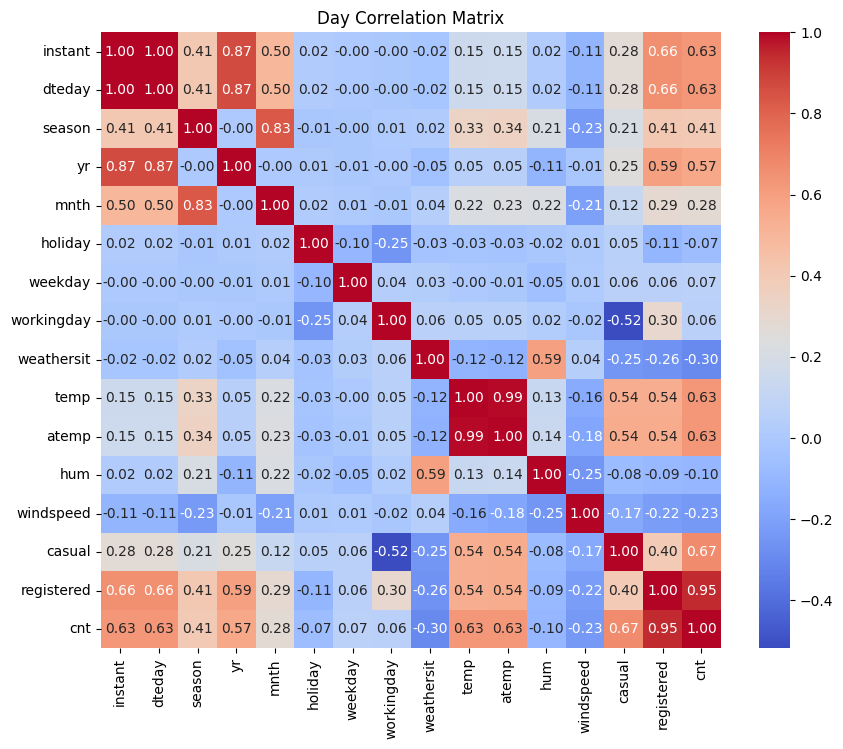

In [14]:
#Correlational check between columns in day dataset
correlation_matrix = day_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Day Correlation Matrix')
plt.show()

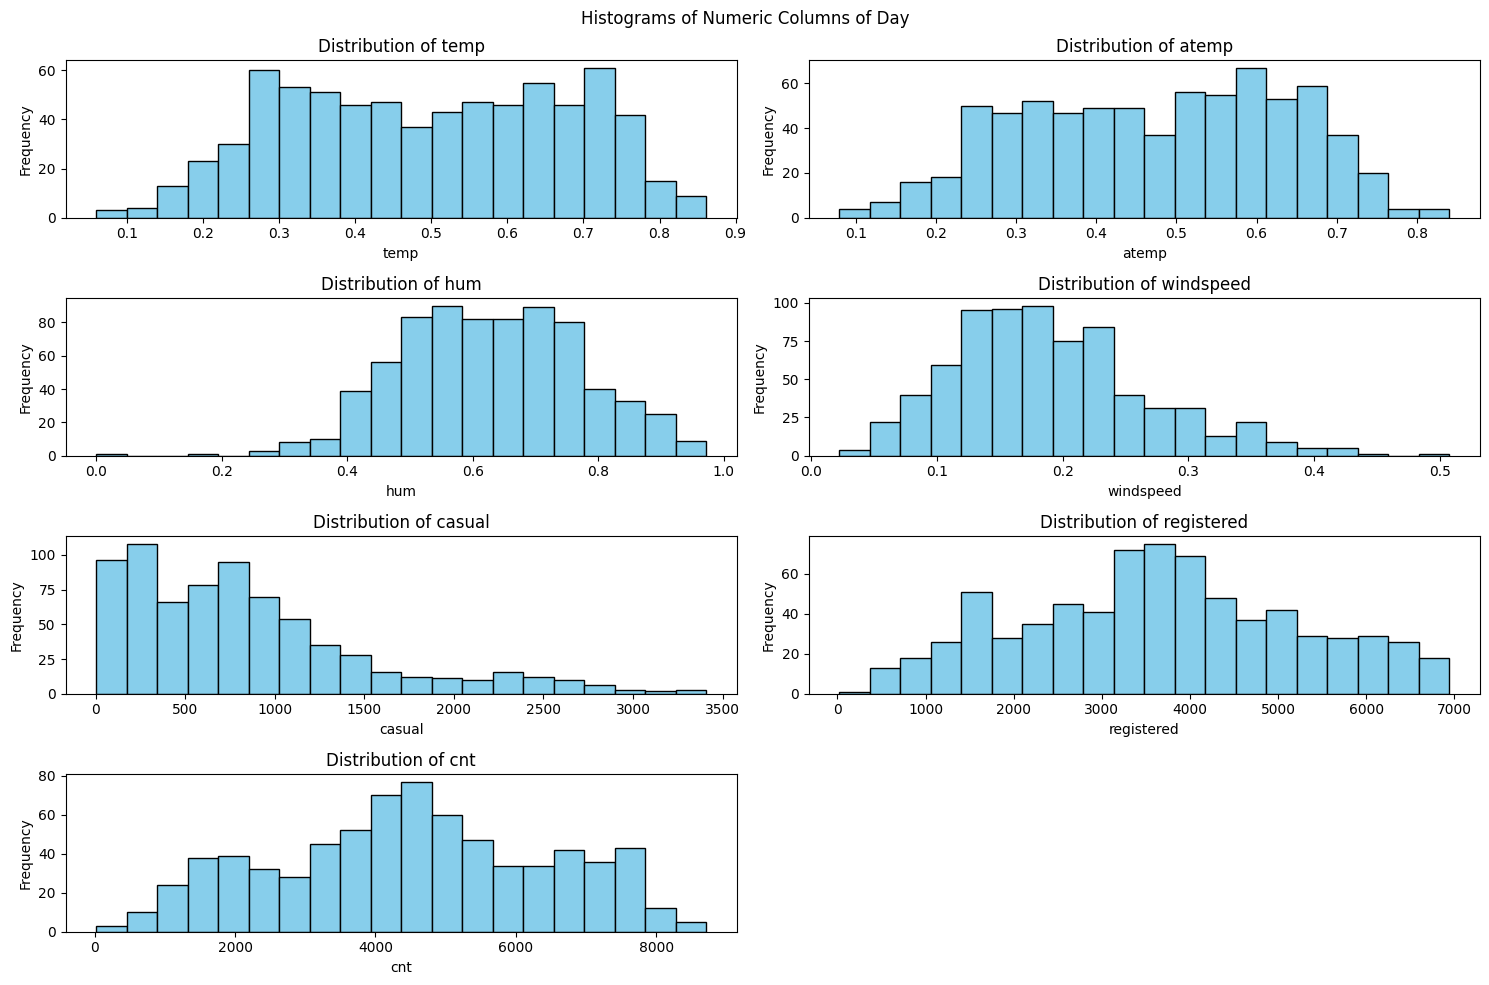

In [15]:
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Setting up subplots
num_plots = len(num_col)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Histograms of Numeric Columns of Day')

# Flatten the axes array to handle both 1-row and multi-row subplots
axes = axes.flatten()

# Plotting every histograms for each numeric column
for i, col in enumerate(num_col):
    ax = axes[i]
    ax.hist(day_df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(num_col), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

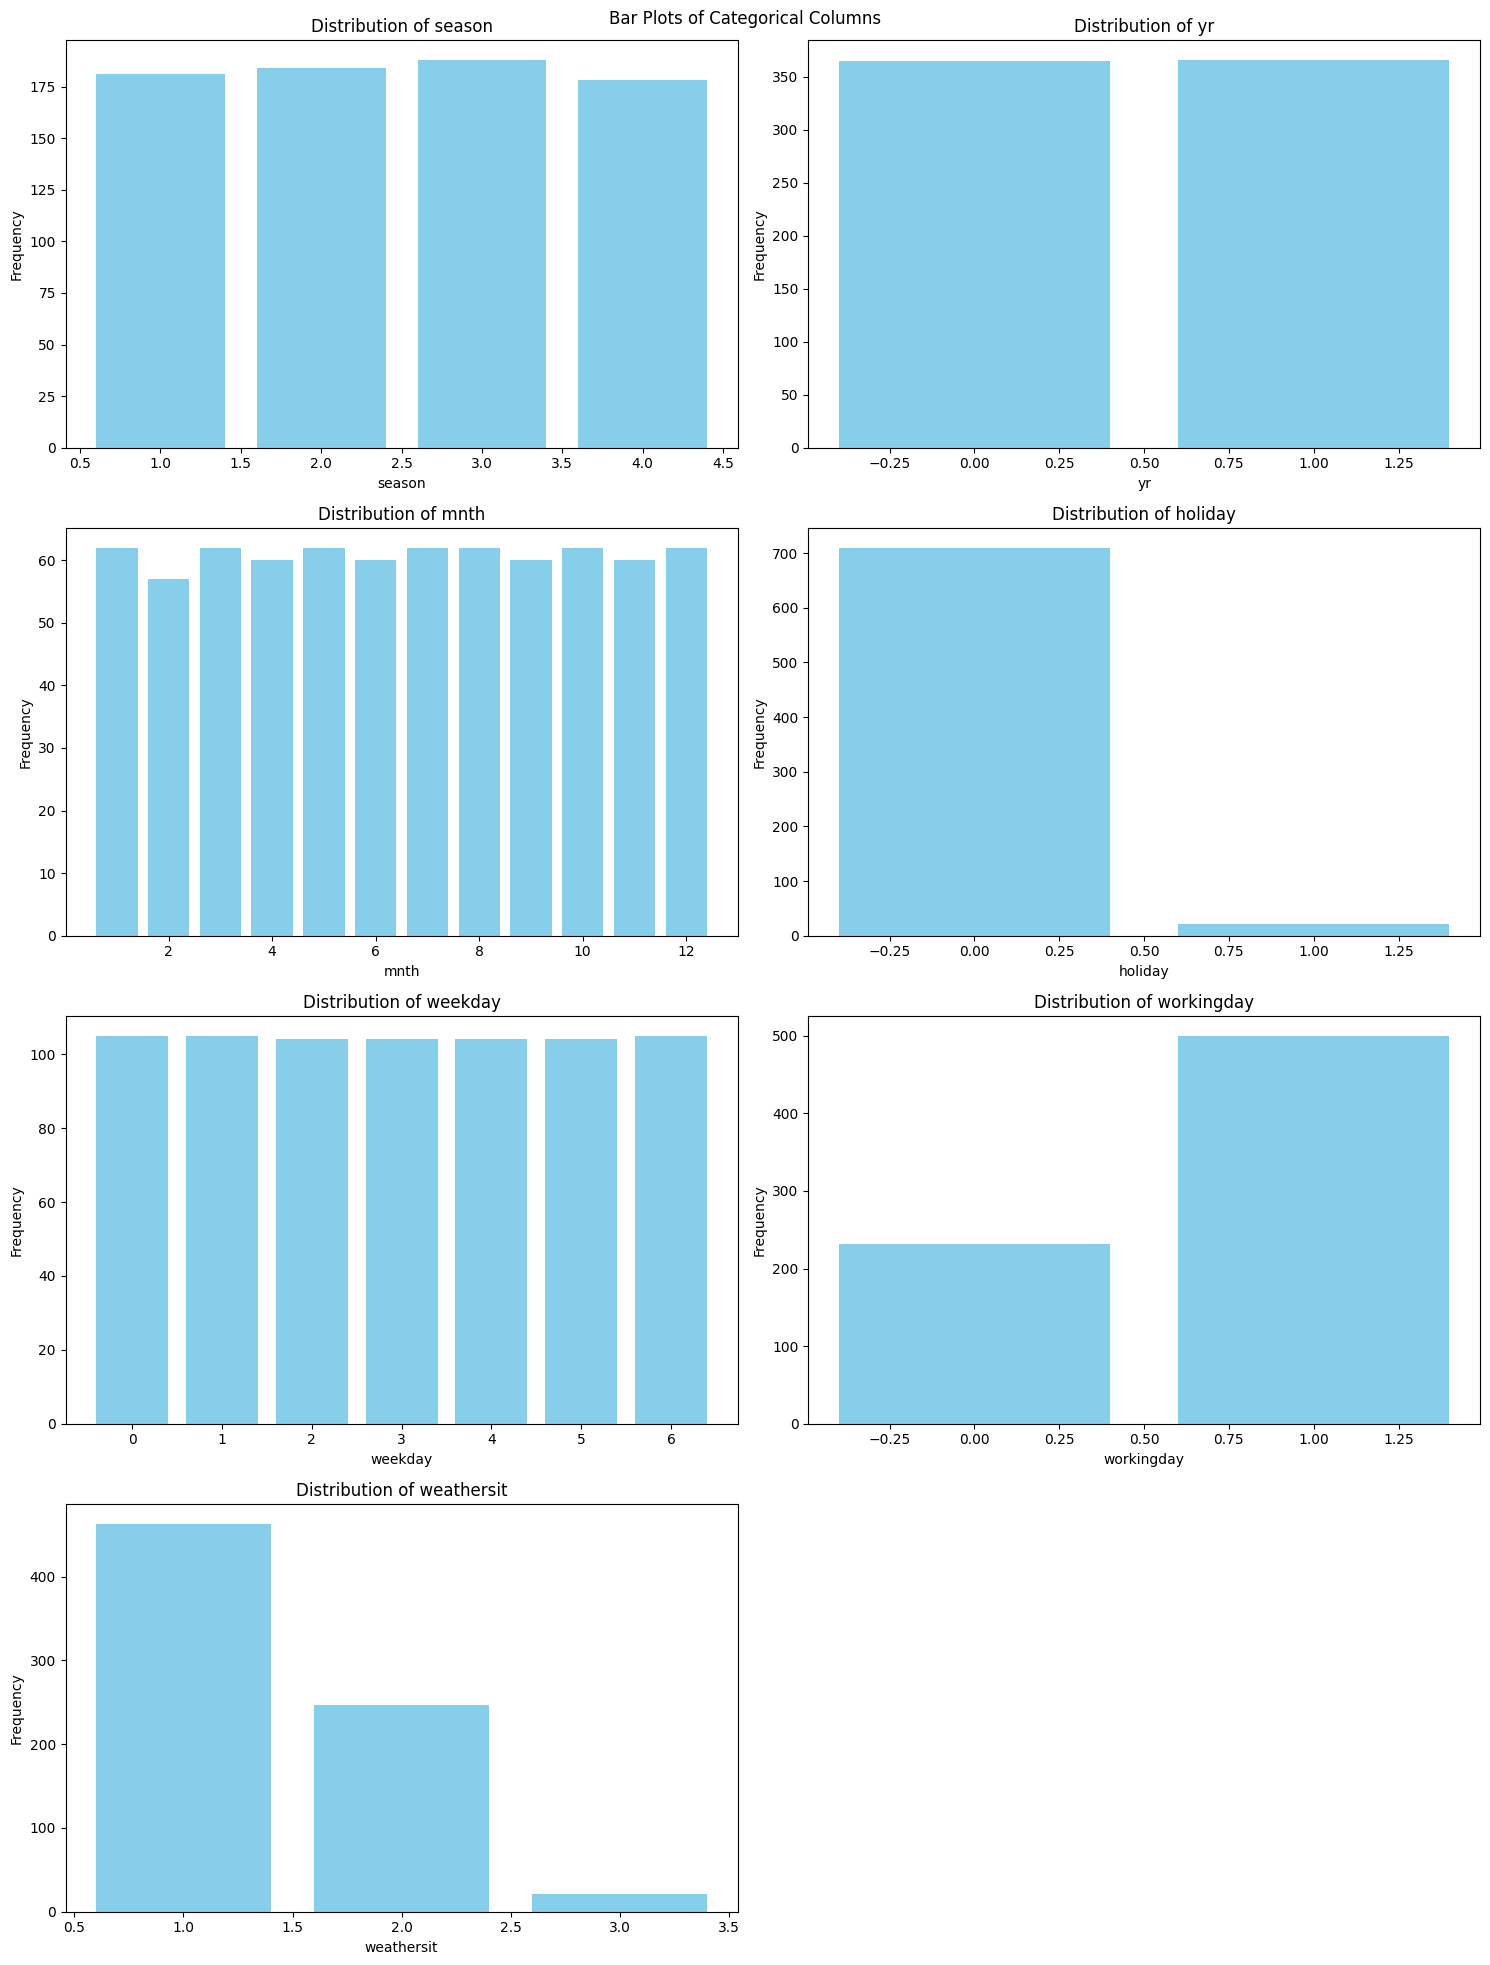

In [16]:
cat_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Seting up subplots
num_plots = len(cat_col)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.suptitle('Bar Plots of Categorical Columns')

# Flatten the axes array to handle both 1-row and multi-row subplots
axes = axes.flatten()

# Plotting bar plots for each categorical column
for i, col in enumerate(cat_col):
    ax = axes[i]
    value_counts = day_df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(cat_col), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


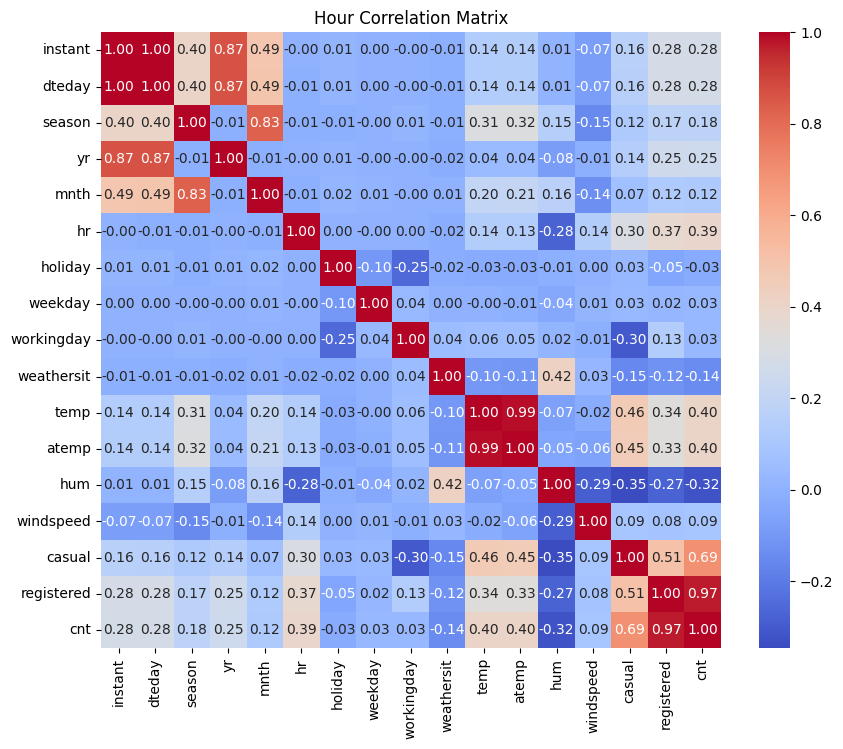

In [17]:
#Correlational check between columns in hour dataset
correlation_matrix = hour_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Hour Correlation Matrix')
plt.show()

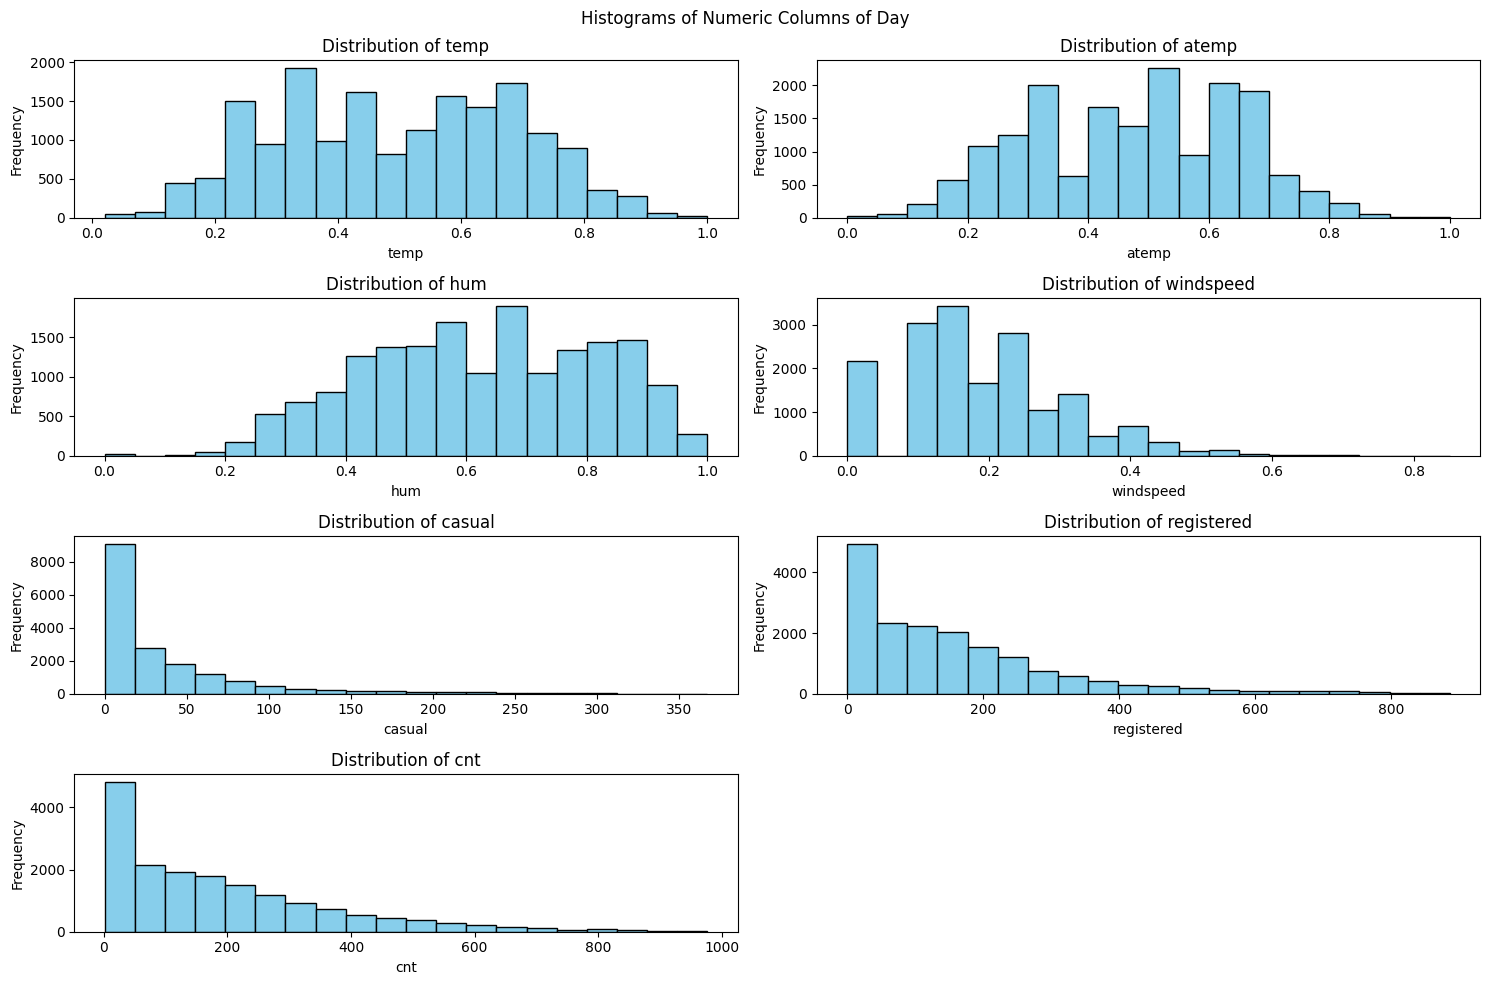

In [18]:
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Setting up subplots
num_plots = len(num_col)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Histograms of Numeric Columns of Day')

# Flatten the axes array to handle both 1-row and multi-row subplots
axes = axes.flatten()

# Plotting every histograms for each numeric column
for i, col in enumerate(num_col):
    ax = axes[i]
    ax.hist(hour_df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(num_col), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

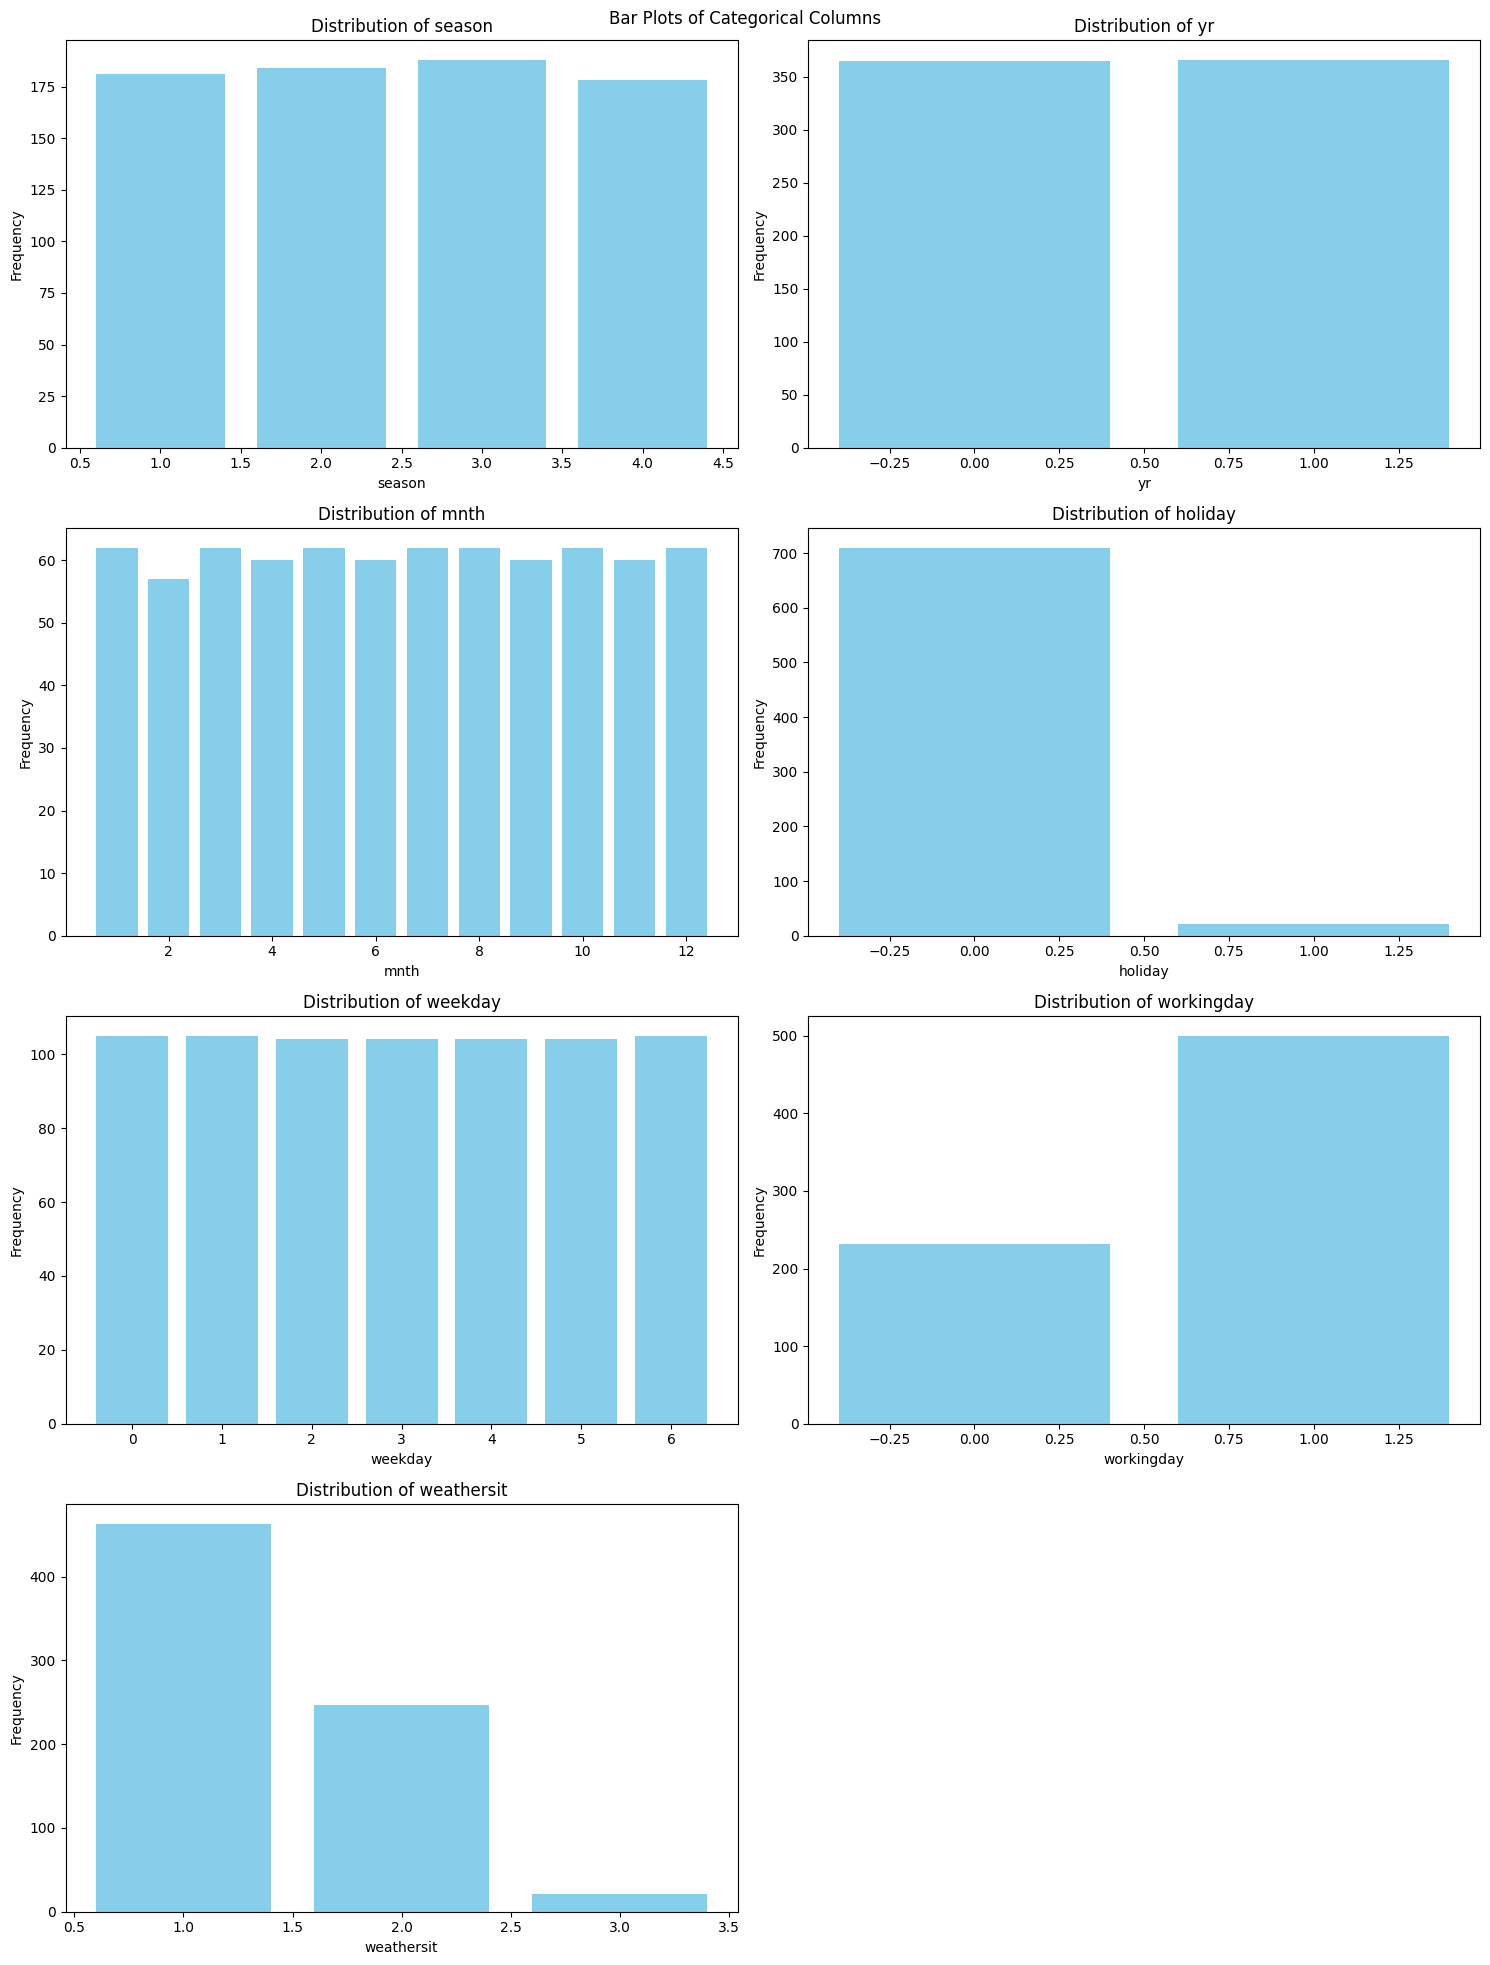

In [19]:
cat_col = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Seting up subplots
num_plots = len(cat_col)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.suptitle('Bar Plots of Categorical Columns')

# Flatten the axes array to handle both 1-row and multi-row subplots
axes = axes.flatten()

# Plotting bar plots for each categorical column
for i, col in enumerate(cat_col):
    ax = axes[i]
    value_counts = day_df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for i in range(len(cat_col), num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: How much the total of rented bike in 2012 during winter season(4)?

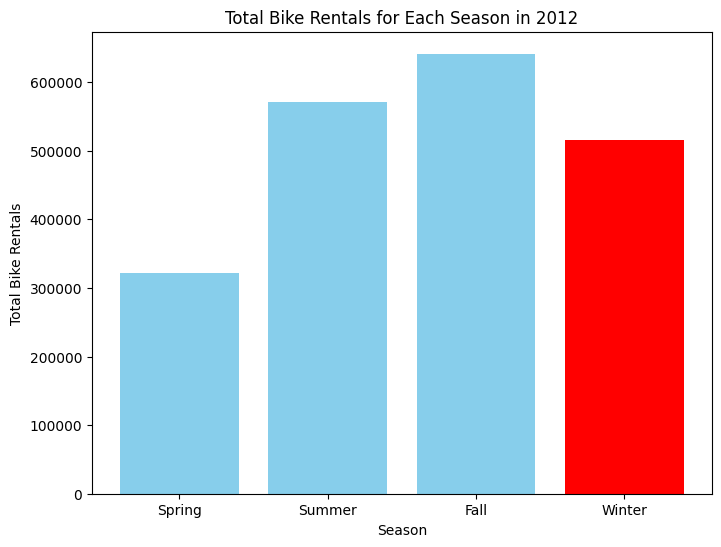

In [20]:
filtered_data_2012 = day_df[day_df["yr"] == 1]
seasonal_rentals = filtered_data_2012.groupby('season')['cnt'].sum()
season = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ['skyblue', 'skyblue', 'skyblue', 'red']


plt.figure(figsize=(8, 6))
plt.bar(season, seasonal_rentals, color=colors)
plt.title('Total Bike Rentals for Each Season in 2012')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.show()

In [21]:
winter_rentals = filtered_data_2012[filtered_data_2012['season'] == 4]['cnt'].sum()

print("Total Bike Rentals for the Winter Season in 2012:", winter_rentals)

Total Bike Rentals for the Winter Season in 2012: 515476


### Pertanyaan 2: Will the weather condition affects the amount of bikes that are being rented?

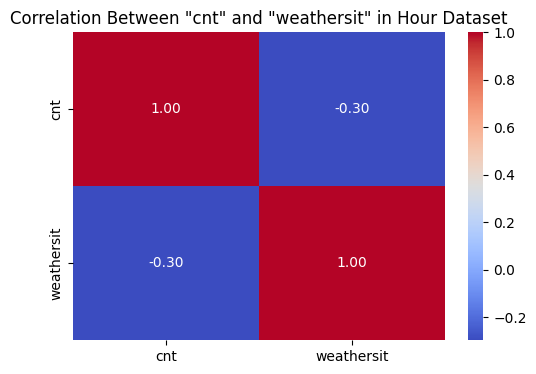

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64


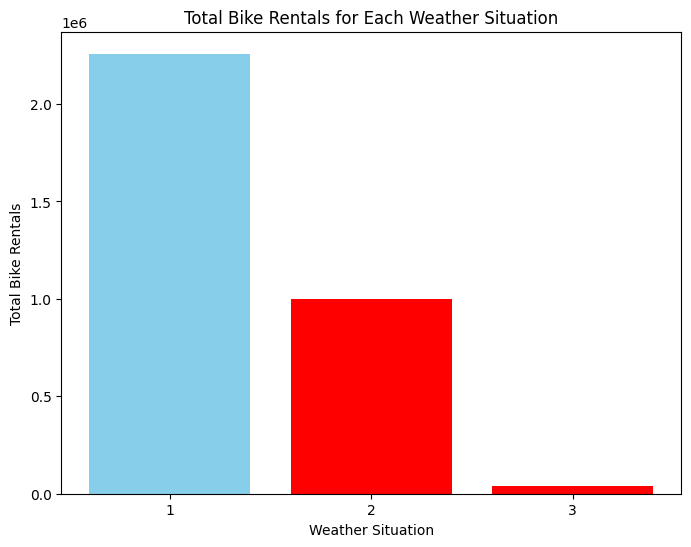

In [22]:
subset_df = day_df[['cnt', 'weathersit']]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between "cnt" and "weathersit" in Hour Dataset')
plt.show()

weather_rentals = day_df.groupby('weathersit')['cnt'].sum()
print(weather_rentals)
weathers = ['1', '2', '3']
colors = ['skyblue', 'red', 'red']


plt.figure(figsize=(8, 6))
plt.bar(weathers, weather_rentals, color=colors)
plt.title('Total Bike Rentals for Each Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.show()

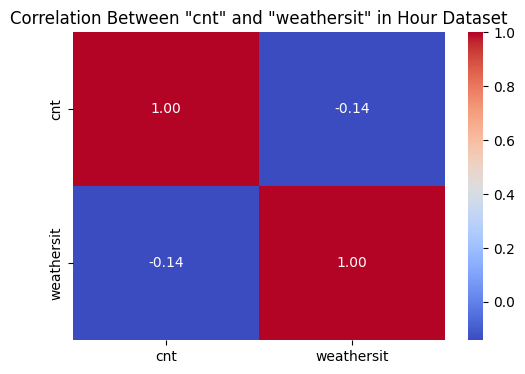

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64


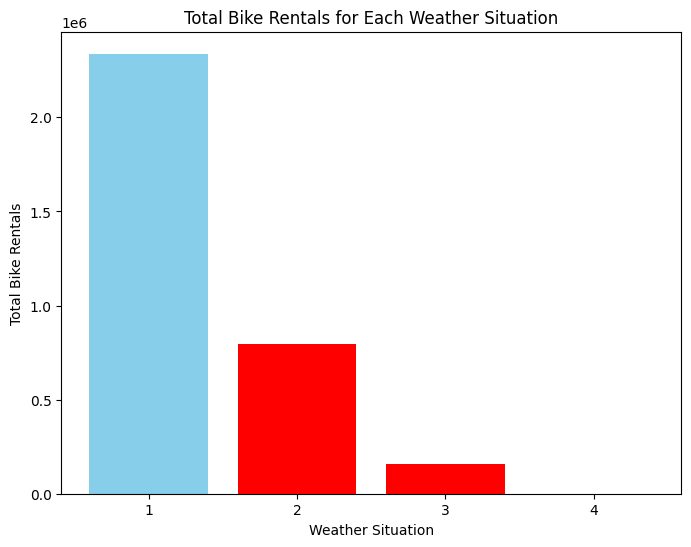

In [23]:
subset_df = hour_df[['cnt', 'weathersit']]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between "cnt" and "weathersit" in Hour Dataset')
plt.show()

weather_rentals = hour_df.groupby('weathersit')['cnt'].sum()
print(weather_rentals)
weathers = ['1', '2', '3','4']
colors = ['skyblue', 'red', 'red','red']


plt.figure(figsize=(8, 6))
plt.bar(weathers, weather_rentals, color=colors)
plt.title('Total Bike Rentals for Each Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Bike Rentals')
plt.show()

## Conclusion

- The total of rentaled bikes in 2012 during the winter reached 515.476 which is not low so the business won't be totally stopped during winter but every other aspects still may affect the total rented bikes
- The weather situation will affect the amount of rented bikes because as we can see when the weather sit is '1' / 'clear' the amount of rented bikes is way more than other weather situation.